**Project Title:-Santander Customer Transaction Prediction using Python**

Problem Statement:- In this challenge, we need to identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted.

In [4]:
#Loading Libraries:-


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score

from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,classification_report,roc_curve,auc

random_state=42
np.random.seed(random_state)
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing datasets
import zipfile
!unzip  '/content/drive/MyDrive/1stprj/Proj1csvs.zip'


Archive:  /content/drive/MyDrive/1stprj/Proj1csvs.zip
  inflating: Proj1csvs/sample_submission.csv  
  inflating: Proj1csvs/test.csv      
  inflating: Proj1csvs/train.csv     


In [5]:
train= pd.read_csv("/content/Proj1csvs/train.csv")
test= pd.read_csv("/content/Proj1csvs/test.csv")



In [ ]:
sample_submission= pd.read_csv('submission.csv')

In [ ]:
train.info()
#information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [ ]:
test.info()
#information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [ ]:
#Target class count
target_class = train['target'].value_counts()
print('Count of the target class :\n', target_class)

# Percentage of target class count
per_target_class = train['target'].value_counts() / len(train) * 100
print('Percentage of target class count :\n', per_target_class)

Count of the target class :
 target
0    179902
1     20098
Name: count, dtype: int64
Percentage of target class count :
 target
0    89.951
1    10.049
Name: count, dtype: float64


In [ ]:
%%time

# Distribution of train attributes

def plot_train_attribute_distribution(t0, t1, label1, label2, train_attributes):
    i = 0
    sns.set_style('darkgrid')

    fig = plt.figure()
    ax = plt.subplots(10, 10, figsize=(22, 18))

    for attribute in train_attributes:
        i += 1
        plt.subplot(10, 10, i)
        sns.distplot(t0[attribute], hist=False, label=label1)
        sns.distplot(t1[attribute], hist=False, label=label2)
        plt.legend()
        plt.xlabel('Attribute',)
        sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    plt.show()


Observation of top 100 train attributes

<Figure size 640x480 with 0 Axes>

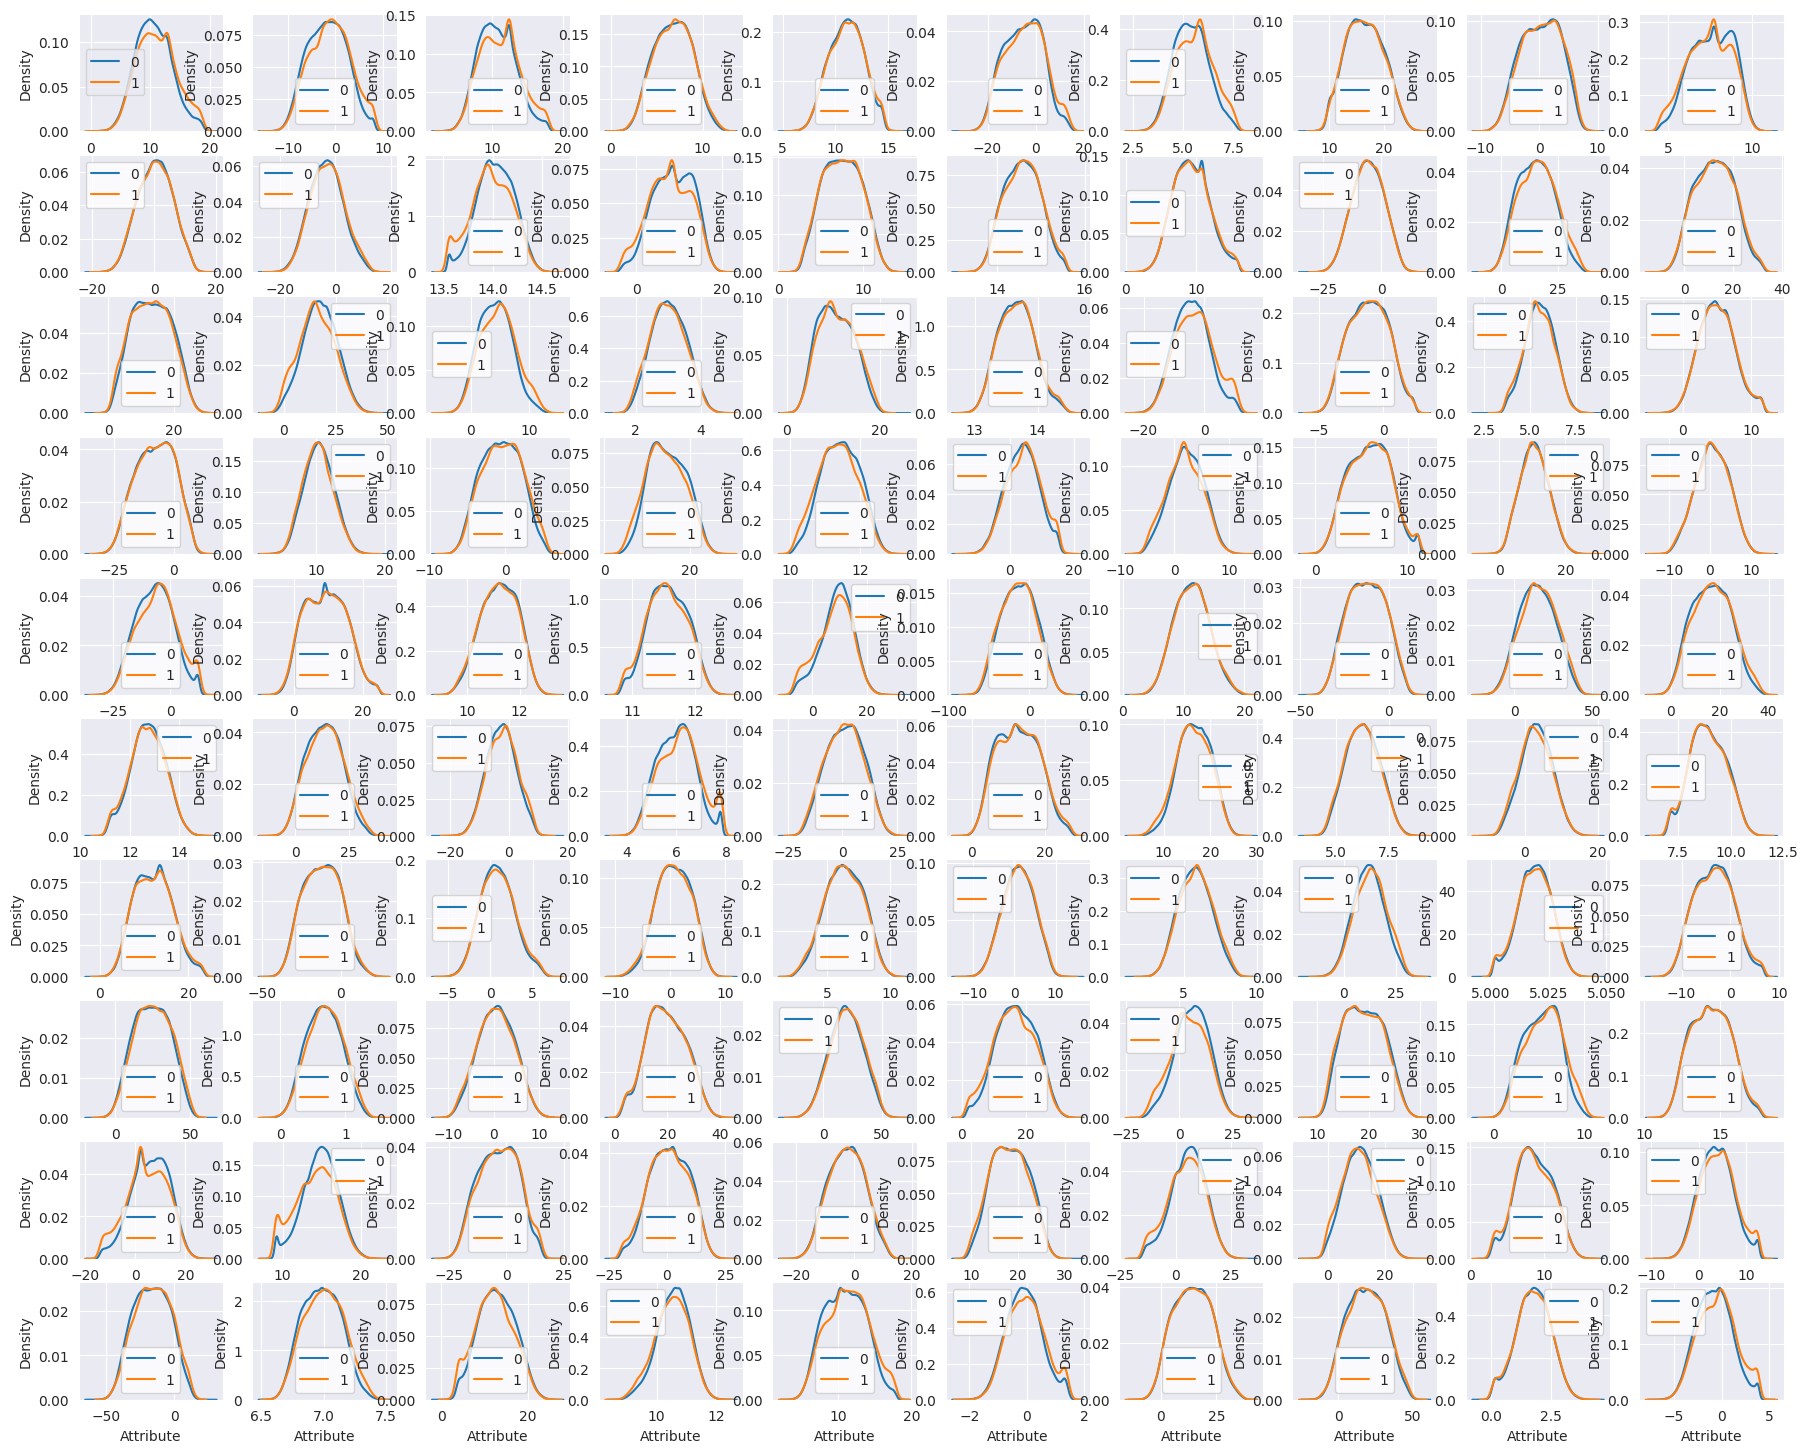

CPU times: user 2min 9s, sys: 21.3 s, total: 2min 31s
Wall time: 2min 15s


In [ ]:
%%time
# Corresponding to negative class
t0 = train[train.target.values == 0]

# Corresponding to positive class
t1 = train[train.target.values == 1]

# Train attributes from 2 to 102
train_attributes = train.columns.values[2:102]

# Plot distribution of train attributes
plot_train_attribute_distribution(t0, t1, '0', '1', train_attributes)



observation of top 100 attributes

<Figure size 640x480 with 0 Axes>

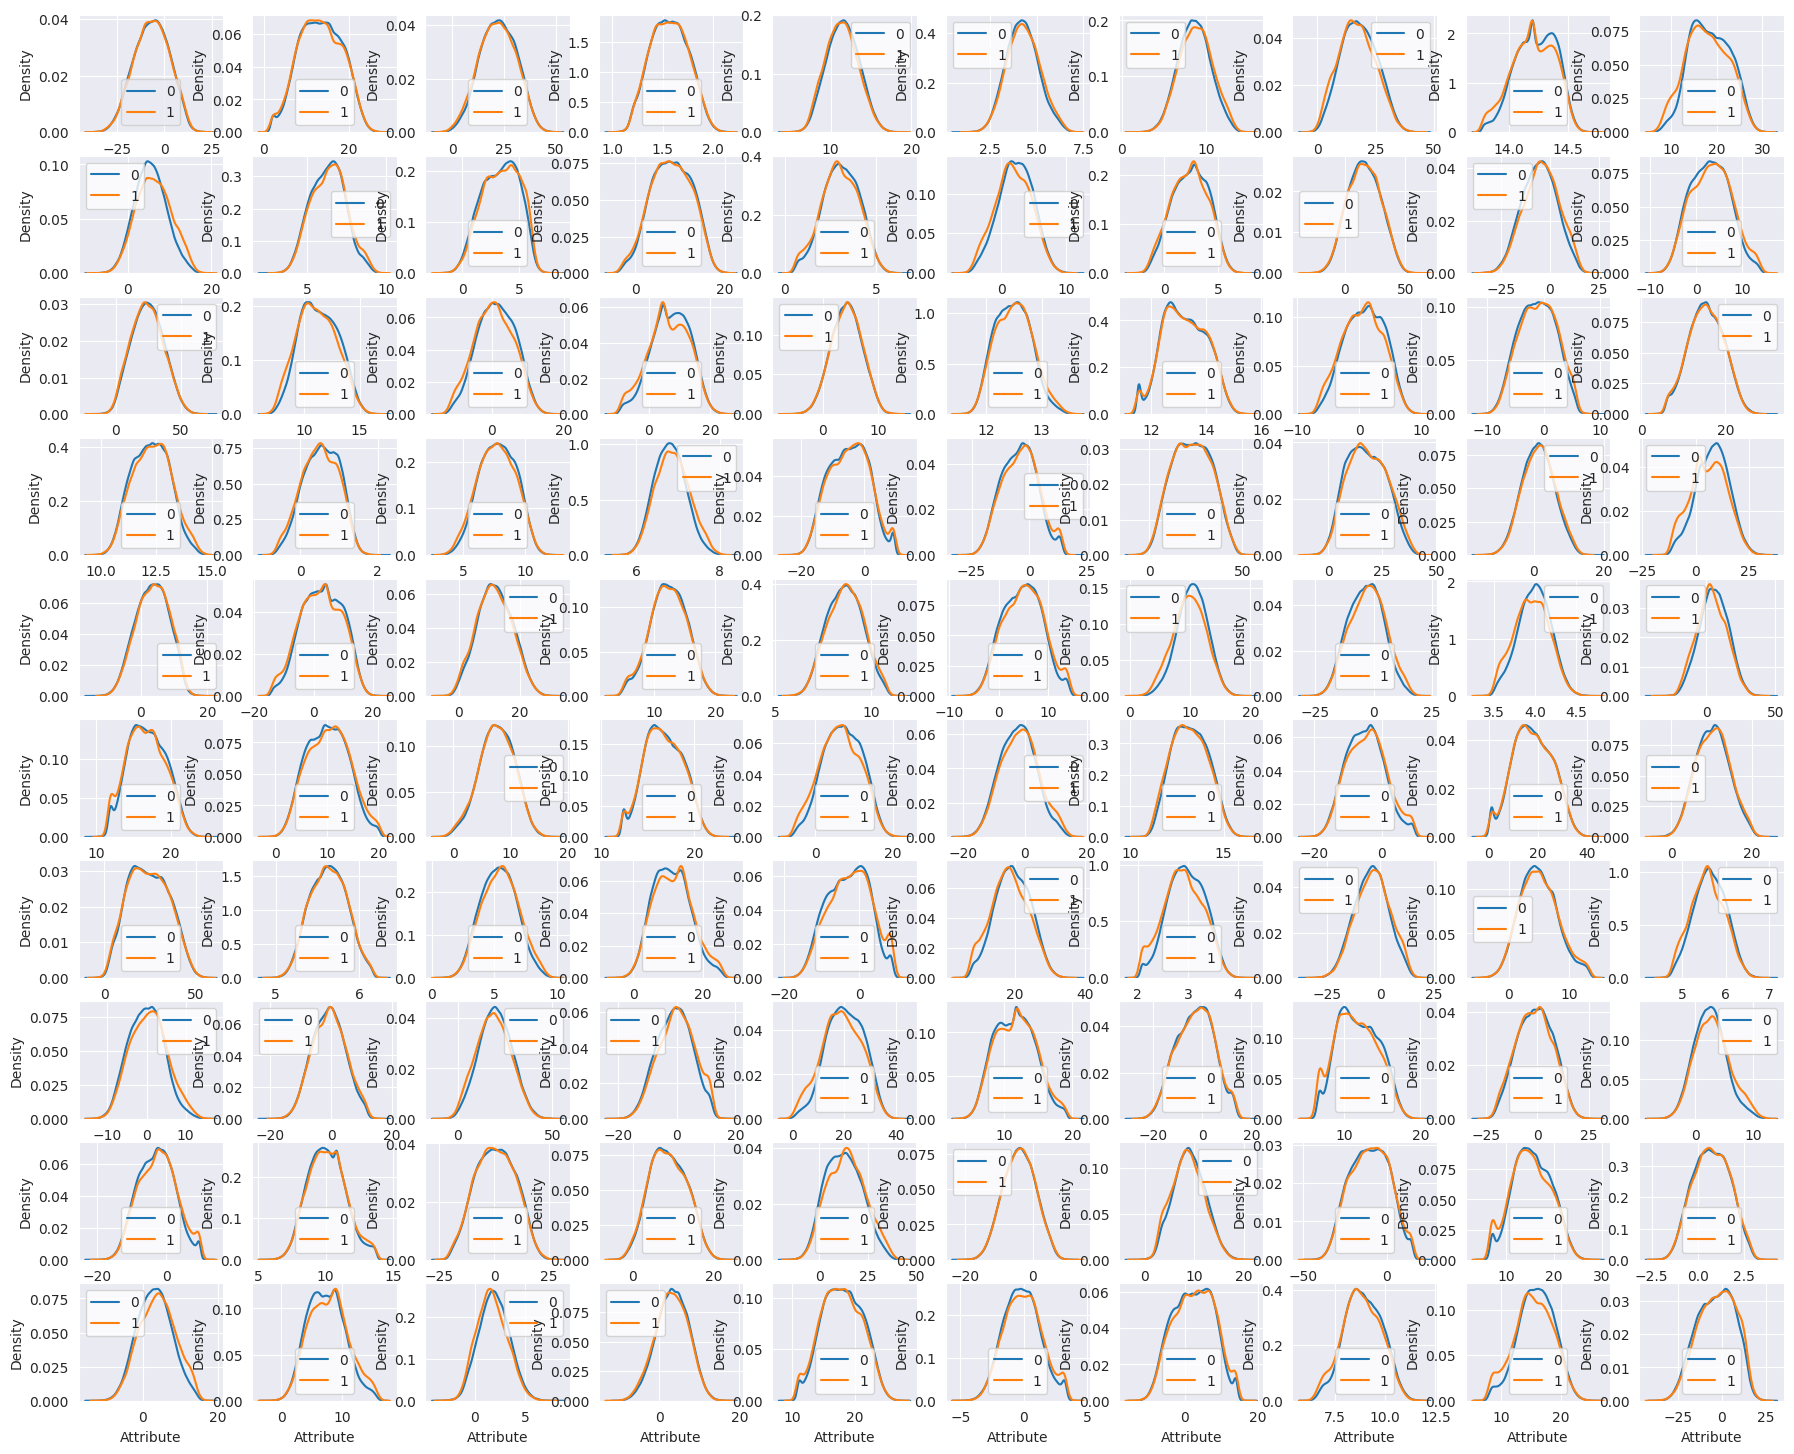

In [ ]:
# Train attributes from 102 to 202
train_attributes = train.columns.values[102:202]

# Plot distribution of train attributes
plot_train_attribute_distribution(t0, t1, '0', '1', train_attributes)

In [ ]:
#importing test dataset
test.head()

ID_code    var_0    var_1    var_2   var_3    var_4   var_5   var_6  \
0  test_0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493   
1  test_1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196   
2  test_2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950   
3  test_3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397   
4  test_4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595   

     var_7   var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.2675  2.1337  ...  -2.1556  11.8495  -1.4300   2.4508  13.7112   2.4669   
1  18.6316 -4.4131  ...  10.6165   8.8349   0.9403  10.1282  15.5765   0.4773   
2  20.2537  1.5233  ...  -0.7484  10.9935   1.9803   2.1800  12.9813   2.1281   
3  20.5660  3.3755  ...   9.5702   9.0766   1.6580   3.5813  15.1874   3.1656   
4  10.6048  2.9890  ...   4.2259   9.1723   1.2835   3.3778  19.5542  -0.2860   

   var_196  var_197  var_198  var_199  
0   4.3654  10.7200  15.4722  -8.7197  
1  -1.4852   9.8714  19.1293 -20.9760  
2  -7.1086   7.0618  19.8956 -23.1794  
3   3.9567   9.2295  13.0168  -4.2108  
4  -5.1612   7.2882  13.9260  -9.1846  

[5 rows x 201 columns]

In [ ]:
#shape of test dataset
test.shape

(200000, 201)

In [ ]:
%%time

#Distribution of test attributes-

def plot_test_attribute_distribution(test_attributes):
    i=0
    sns.set_style('darkgrid')

    fig=plt.figure()
    ax=plt.subplots(10,10,figsize=(22,18))

    for attribute in test_attributes:
        i+=1
        plt.subplot(10,10,i)
        sns.distplot(test[attribute],hist=False)
        plt.xlabel('Attribute',)
        sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    plt.show()

CPU times: user 15 µs, sys: 0 ns, total: 15 µs
Wall time: 22.6 µs


<Figure size 640x480 with 0 Axes>

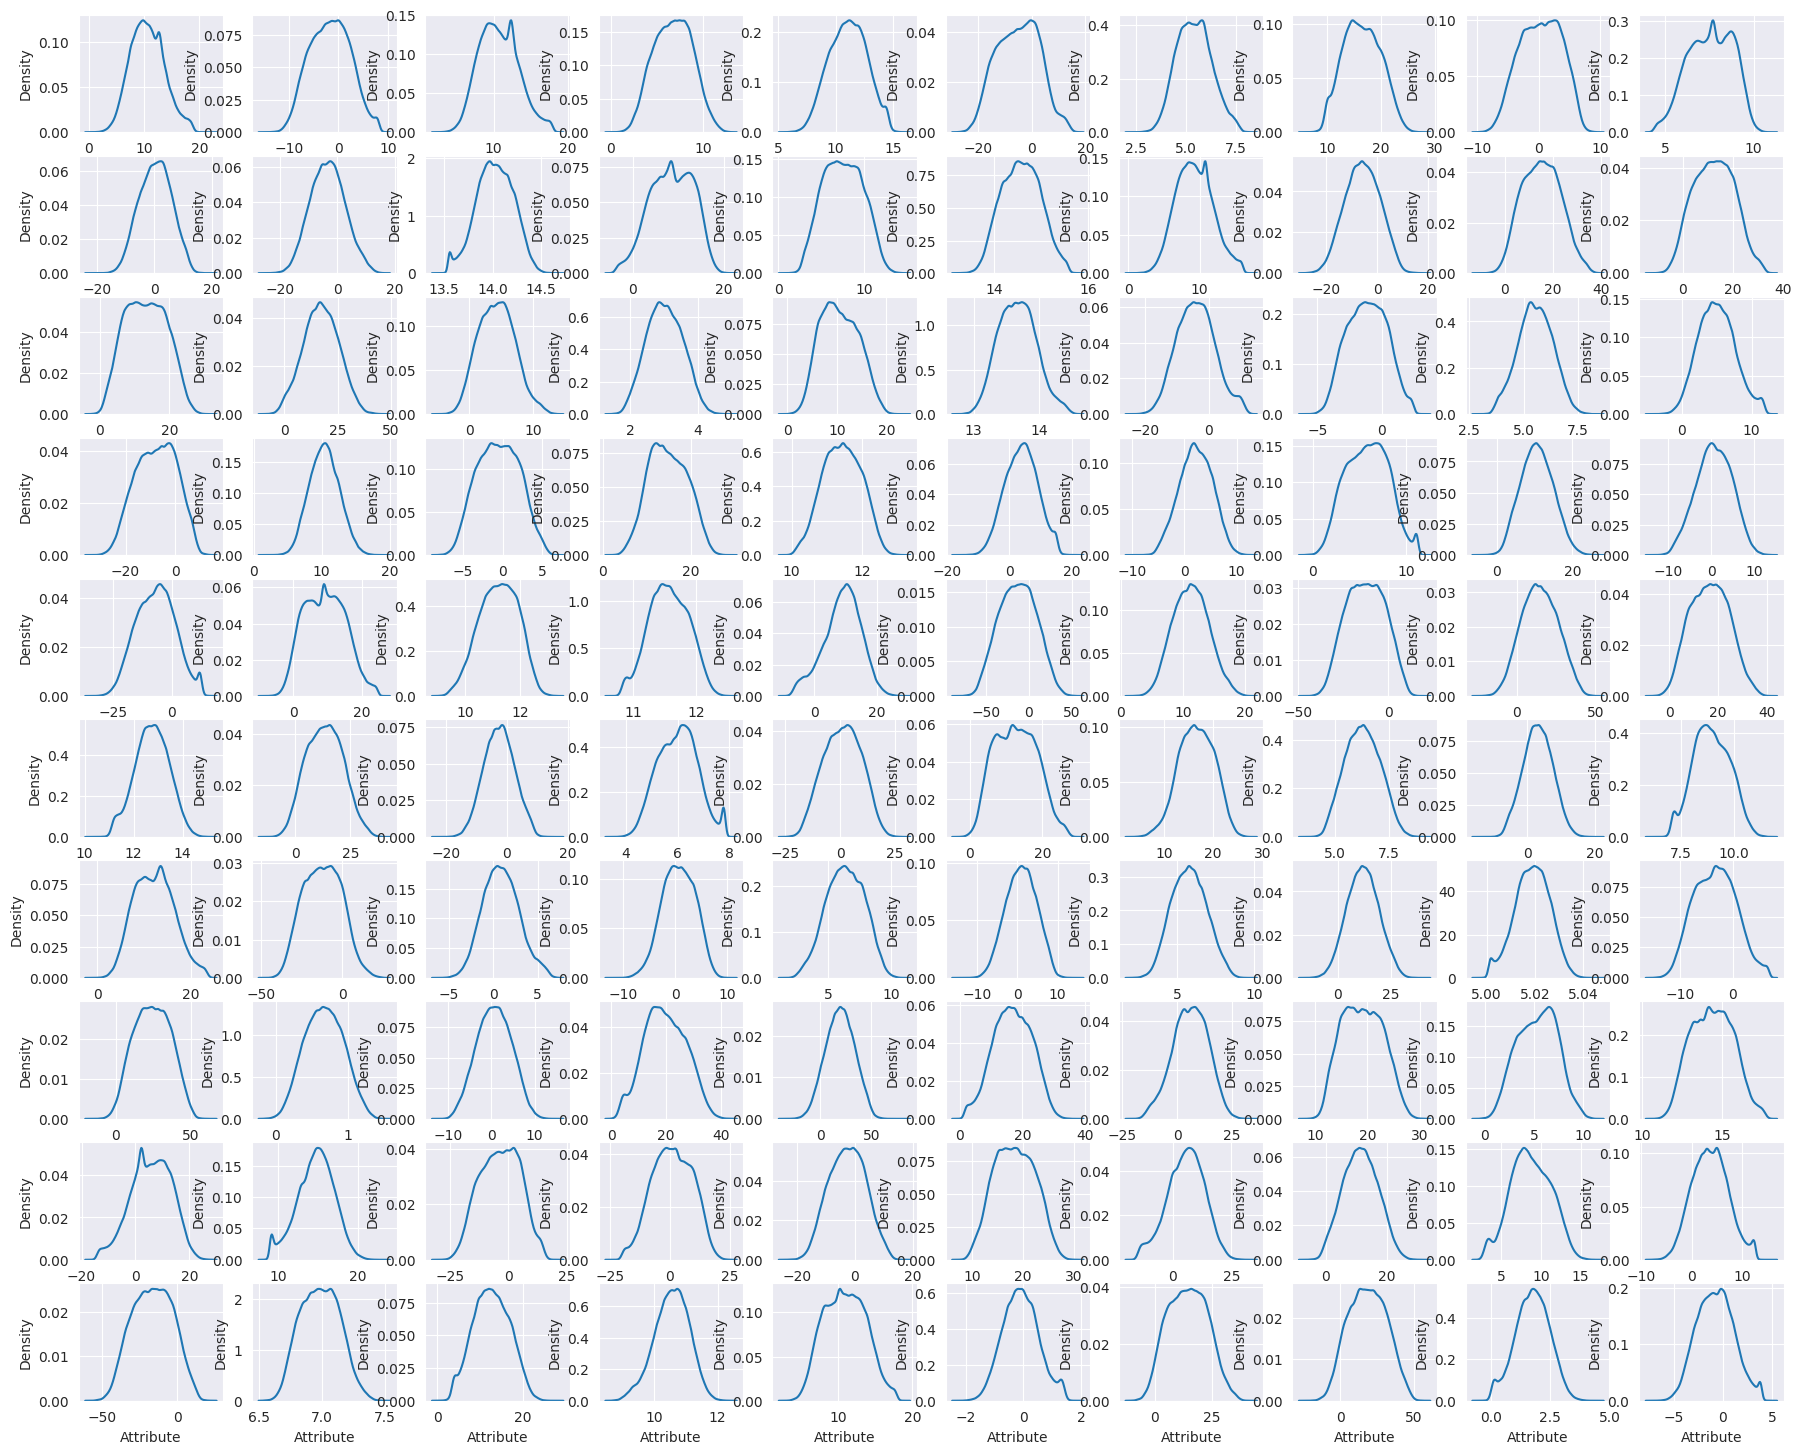

CPU times: user 2min, sys: 10.5 s, total: 2min 11s
Wall time: 2min 3s


In [ ]:
#obsrvation of 100 attributes
%%time
#test attribiutes from 1 to 101 -
test_attributes=test.columns.values[1:101]

#Plot distribution of test attributes -
plot_test_attribute_distribution(test_attributes)

<Figure size 640x480 with 0 Axes>

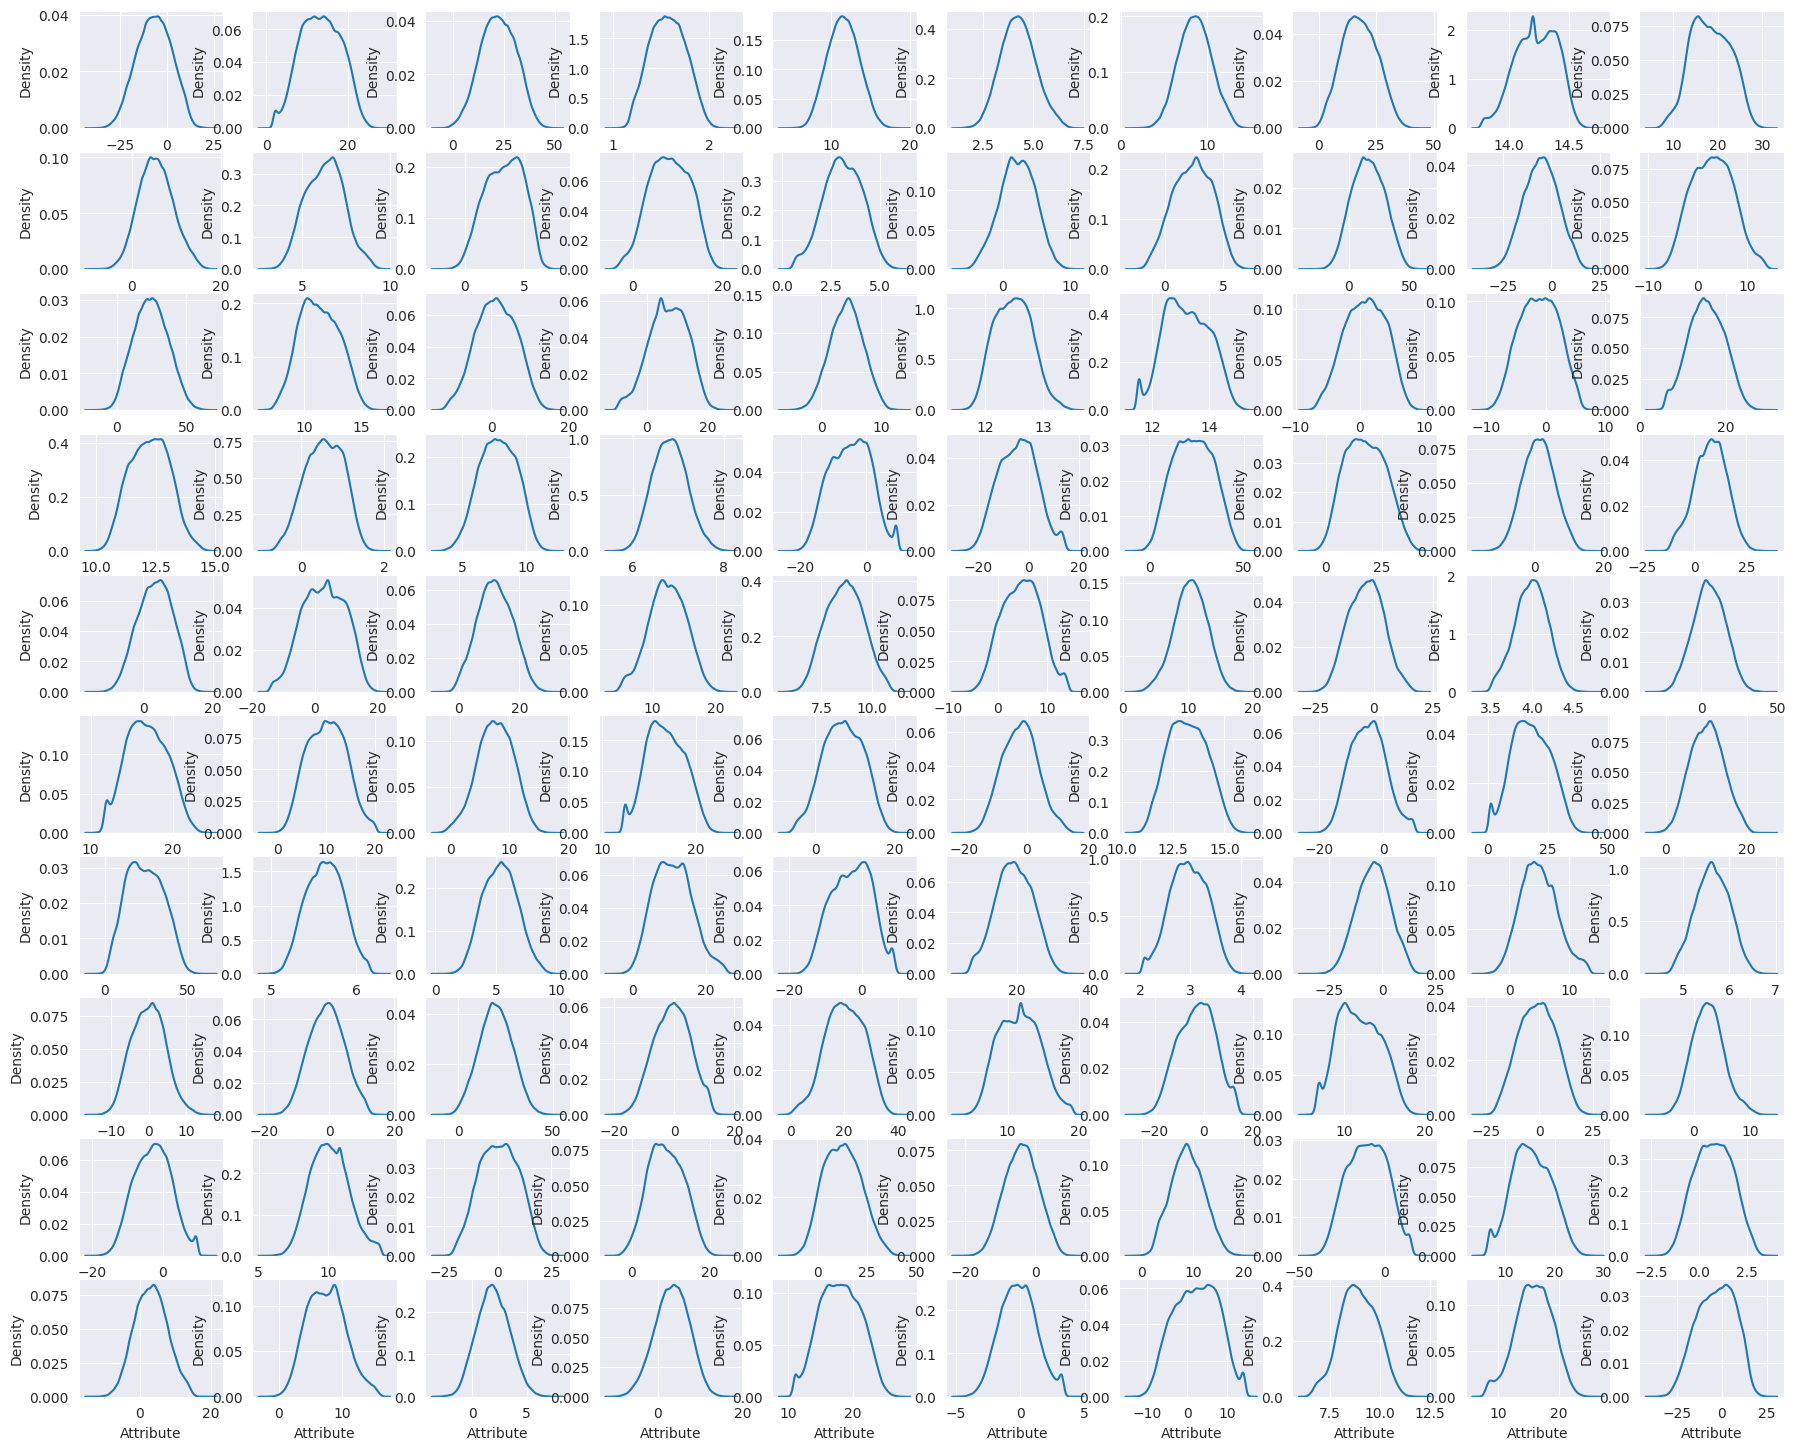

CPU times: user 2min, sys: 10.4 s, total: 2min 10s
Wall time: 2min 2s


In [ ]:
#obsevation of next 100 attributets
%%time
#test attributes from 101 to 202-
test_attributes=test.columns.values[101:202]

#Plot the distribution of test attributes-
plot_test_attribute_distribution(test_attributes)

Distribution of Mean Values per rows & columns:

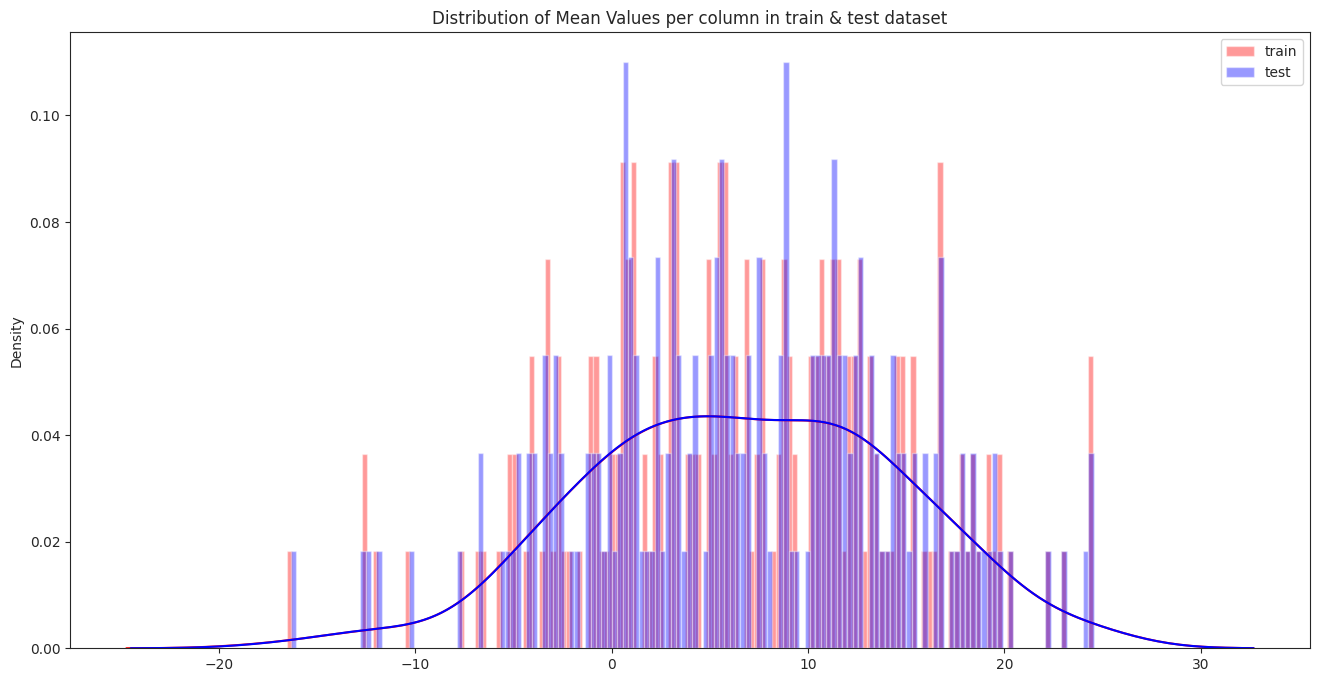

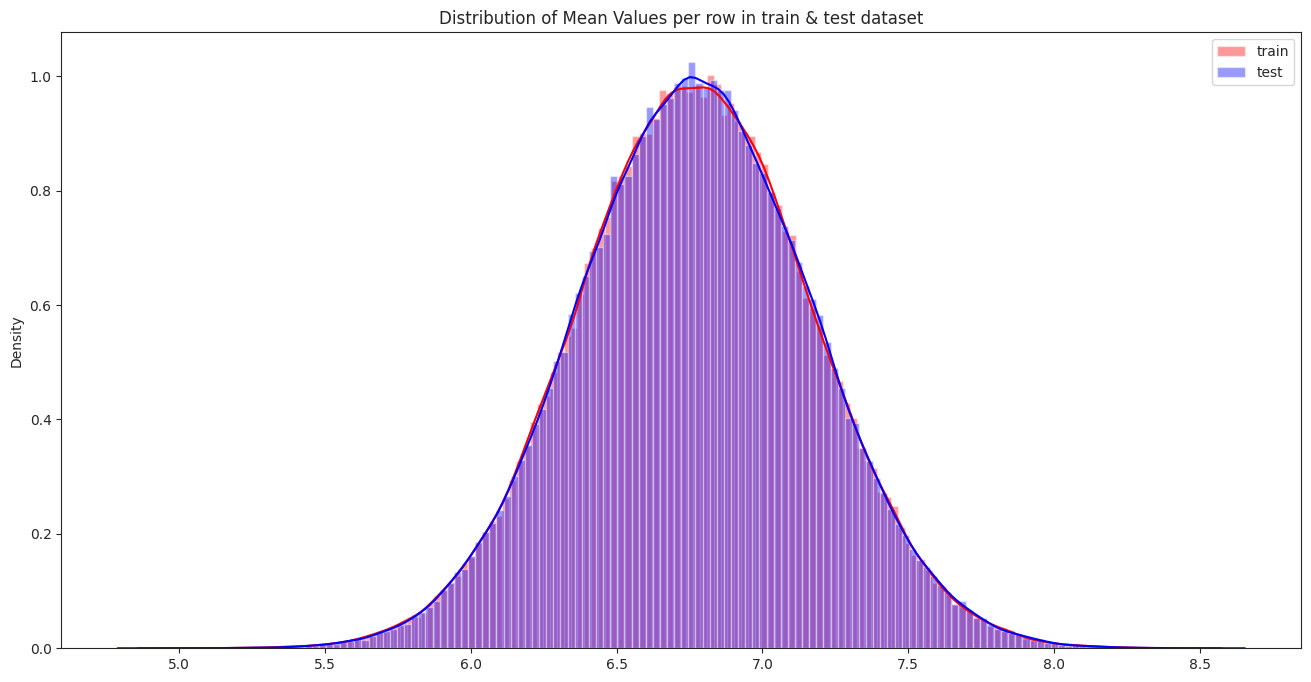

CPU times: user 4.95 s, sys: 3.28 s, total: 8.23 s
Wall time: 8.19 s


In [ ]:
%%time
#Distribution of Mean Values per column in train & test dataset:-
plt.figure(figsize=(16,8))

#Train attributes-
train_attributes=train.columns.values[2:202]

#Test attributes-
test_attributes=test.columns.values[1:201]

#Distribution plot for mean values per column in train attributes:
sns.distplot(train[train_attributes].mean(axis=0),color='red',kde=True,bins=150,label='train')

#Distribution plot for mean values per column in test attributes:
sns.distplot(test[test_attributes].mean(axis=0),color='blue',kde=True,bins=150,label='test')

plt.title('Distribution of Mean Values per column in train & test dataset')
plt.legend()
plt.show()


#Distribution of Mean Values per column in train & test dataset:-
plt.figure(figsize=(16,8))

#Distribution plot for mean values per rows in train attributes:
sns.distplot(train[train_attributes].mean(axis=1),color='red',kde=True,bins=150,label='train')

#Distribution plot for mean values per rows in test attributes:
sns.distplot(test[test_attributes].mean(axis=1),color='blue',kde=True,bins=150,label='test')

plt.title('Distribution of Mean Values per row in train & test dataset')
plt.legend()
plt.show()

**Distribution of Standard Deviation Values per rows & columns:**

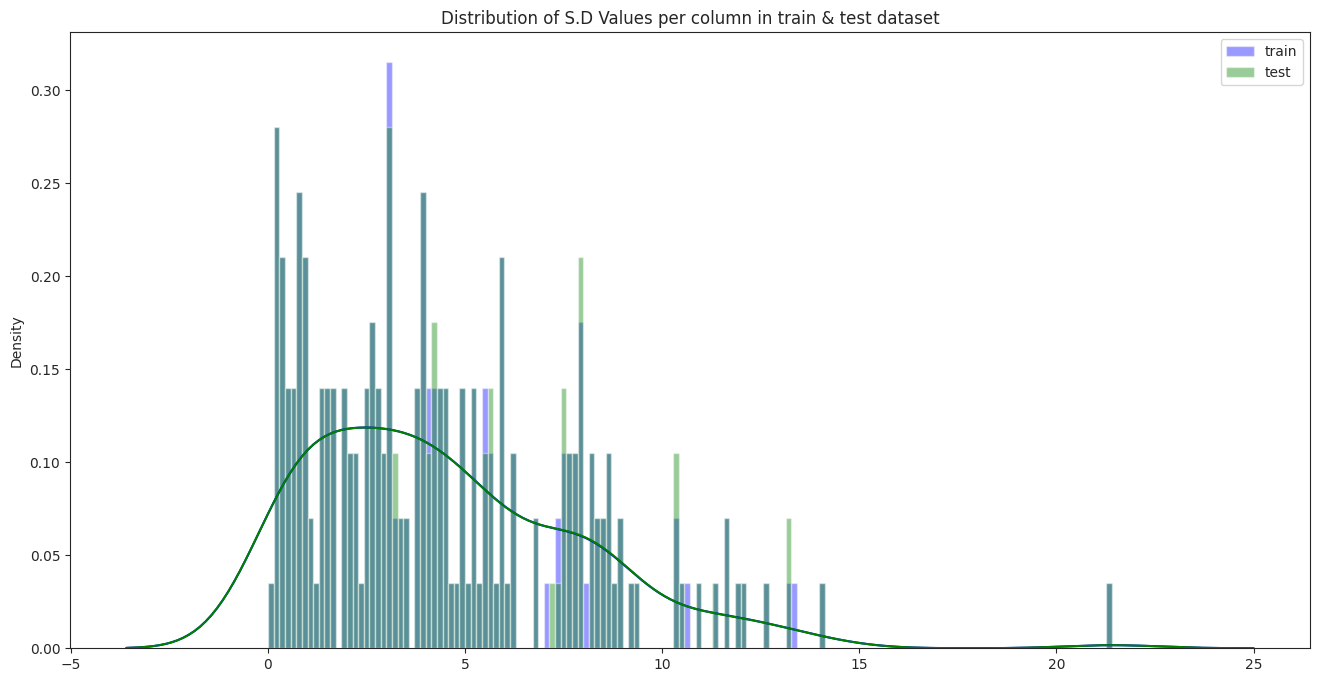

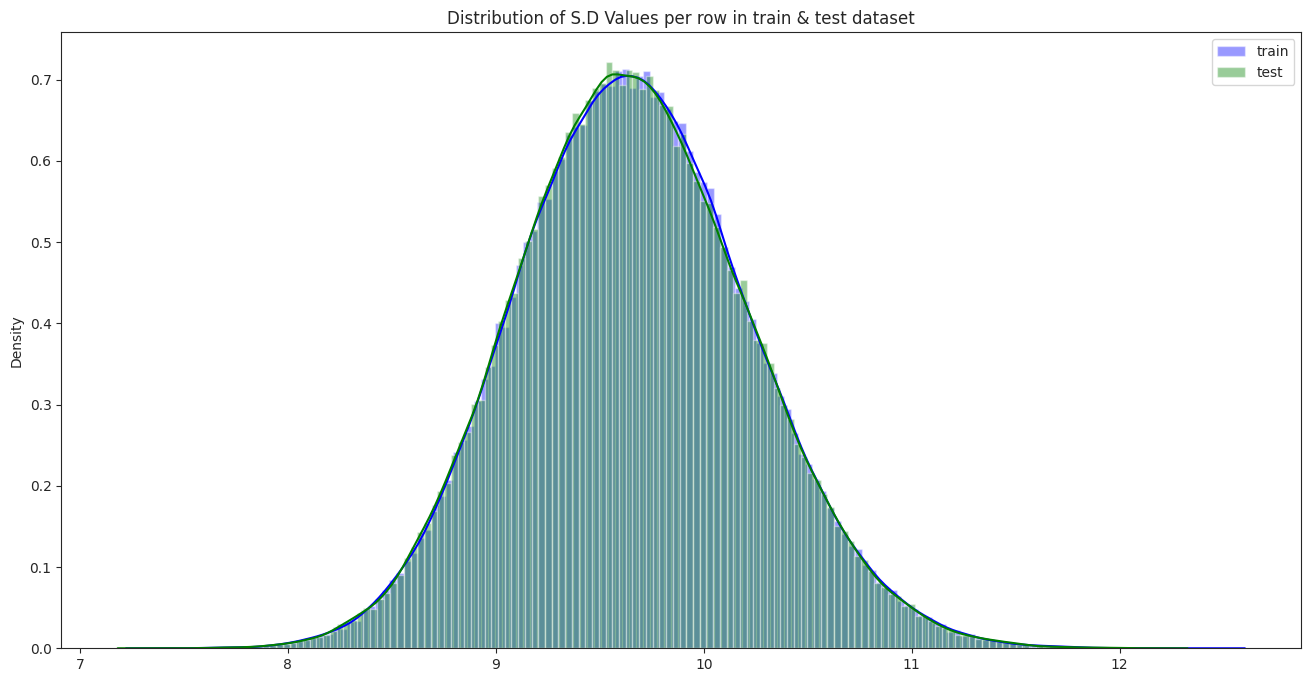

CPU times: user 5.92 s, sys: 3.71 s, total: 9.64 s
Wall time: 9.15 s


In [ ]:
%%time
# Distribution of S.D Values per column in train & test dataset
plt.figure(figsize=(16,8))

# Train attributes
train_attributes = train.columns.values[2:202]

# Test attributes
test_attributes = test.columns.values[1:201]

# Distribution plot for S.D values per column in train attributes
sns.distplot(train[train_attributes].std(axis=0), color='blue', kde=True, bins=150, label='train')

# Distribution plot for S.D values per column in test attributes
sns.distplot(test[test_attributes].std(axis=0), color='green', kde=True, bins=150, label='test')

plt.title('Distribution of S.D Values per column in train & test dataset')
plt.legend()
plt.show()


# Distribution of S.D Values per column in train & test dataset
plt.figure(figsize=(16,8))

# Distribution plot for S.D values per rows in train attributes
sns.distplot(train[train_attributes].std(axis=1), color='blue', kde=True, bins=150, label='train')

# Distribution plot for S.D values per rows in test attributes
sns.distplot(test[test_attributes].std(axis=1), color='green', kde=True, bins=150, label='test')

plt.title('Distribution of S.D Values per row in train & test dataset')
plt.legend()
plt.show()


**Distribution of Skewness Values per rows & columns:**


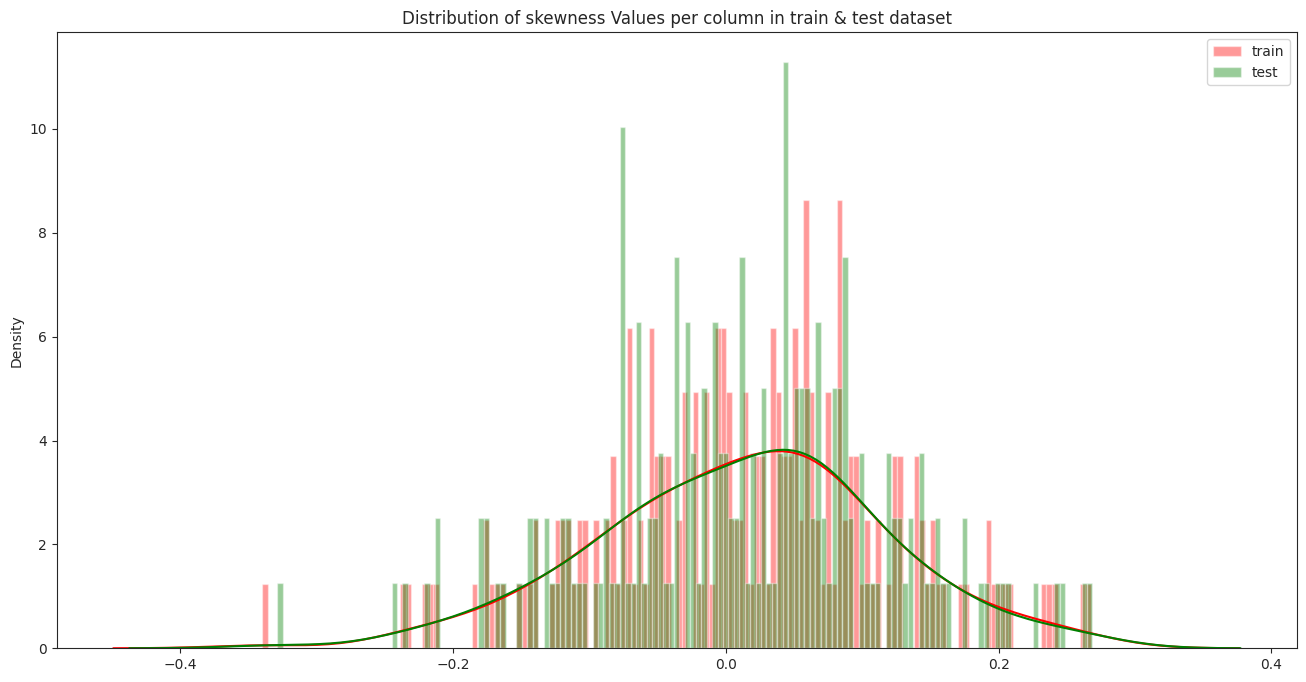

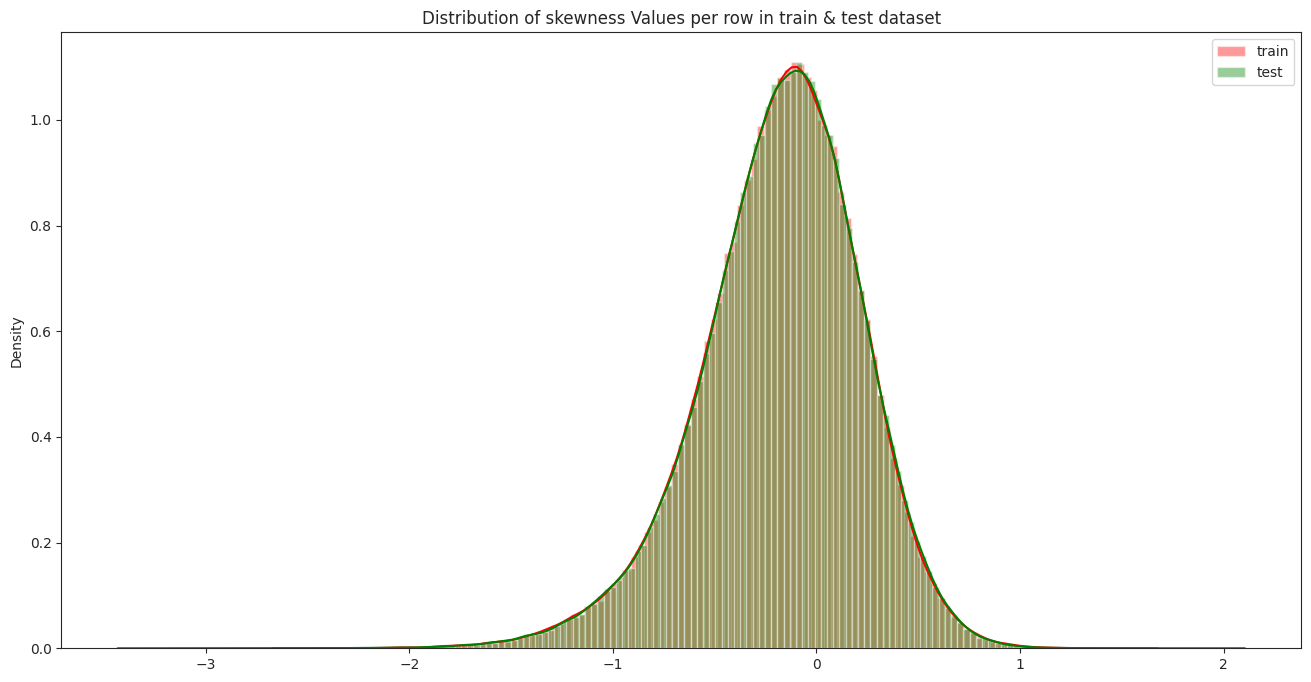

CPU times: user 7.14 s, sys: 6.53 s, total: 13.7 s
Wall time: 13.8 s


In [ ]:
%%time
# Distribution of skew Values per column in train & test dataset
plt.figure(figsize=(16,8))

# Train attributes
train_attributes = train.columns.values[2:202]

# Test attributes
test_attributes = test.columns.values[1:201]

# Distribution plot for skew values per column in train attributes
sns.distplot(train[train_attributes].skew(axis=0), color='red', kde=True, bins=150, label='train')

# Distribution plot for skew values per column in test attributes
sns.distplot(test[test_attributes].skew(axis=0), color='green', kde=True, bins=150, label='test')

plt.title('Distribution of skewness Values per column in train & test dataset')
plt.legend()
plt.show()


# Distribution of skew Values per column in train & test dataset
plt.figure(figsize=(16,8))

# Distribution plot for skew values per rows in train attributes
sns.distplot(train[train_attributes].skew(axis=1), color='red', kde=True, bins=150, label='train')

# Distribution plot for skew values per rows in test attributes
sns.distplot(test[test_attributes].skew(axis=1), color='green', kde=True, bins=150, label='test')

plt.title('Distribution of skewness Values per row in train & test dataset')
plt.legend()
plt.show()


**Distribution of kurtosis Values per rows & columns:**

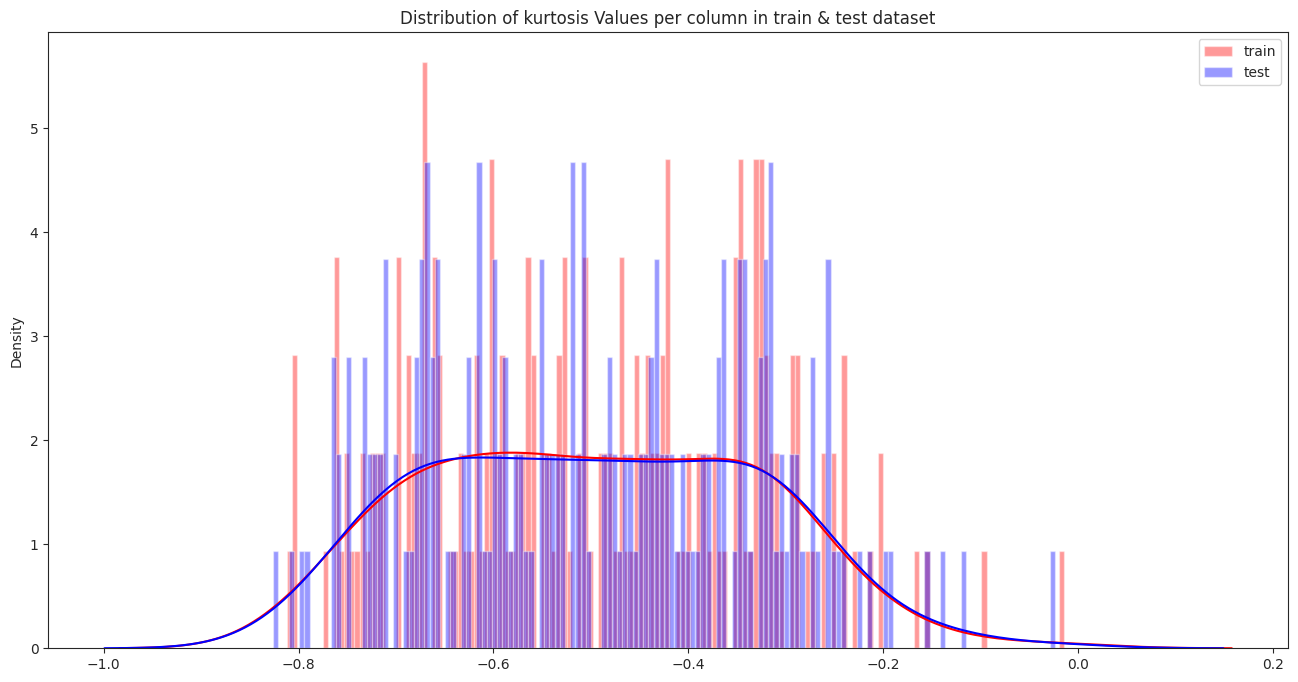

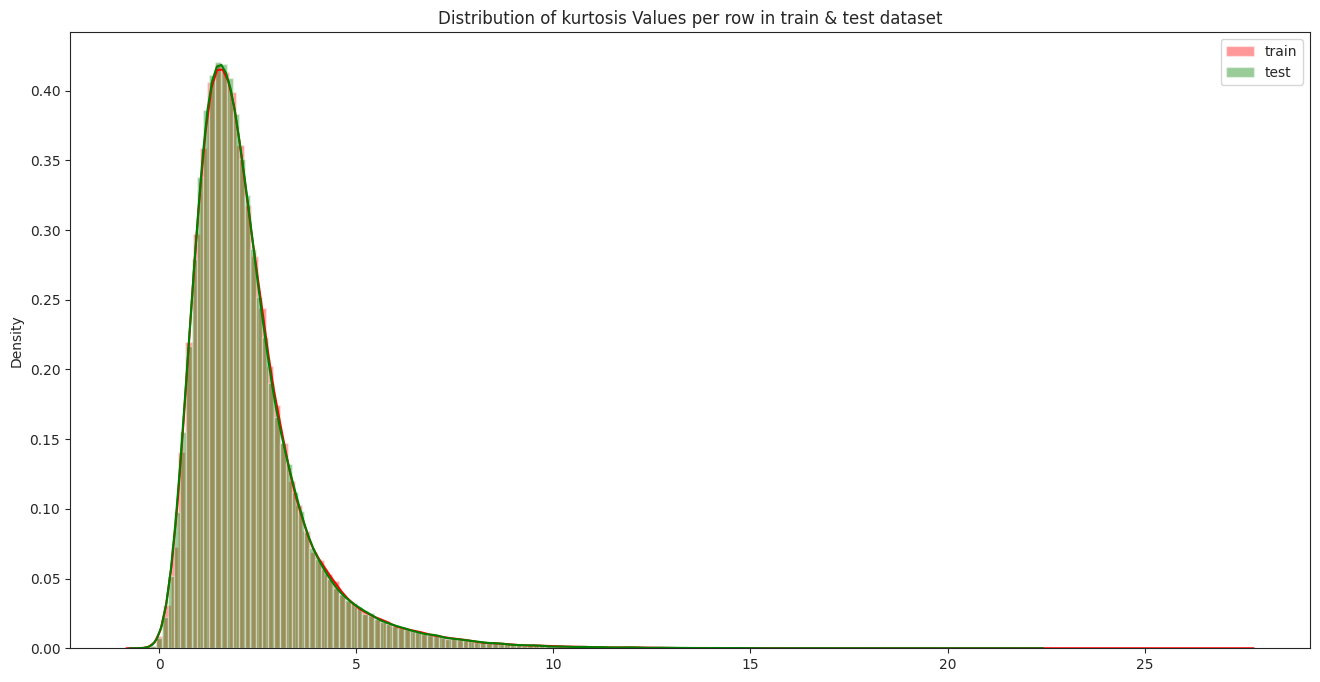

CPU times: user 6.65 s, sys: 7.17 s, total: 13.8 s
Wall time: 17.7 s


In [ ]:
%%time
# Distribution of kurtosis Values per column in train & test dataset
plt.figure(figsize=(16,8))

# Train attributes
train_attributes = train.columns.values[2:202]

# Test attributes
test_attributes = test.columns.values[1:201]

# Distribution plot for kurtosis values per column in train attributes
sns.distplot(train[train_attributes].kurtosis(axis=0), color='red', kde=True, bins=150, label='train')

# Distribution plot for kurtosis values per column in test attributes
sns.distplot(test[test_attributes].kurtosis(axis=0), color='blue', kde=True, bins=150, label='test')

plt.title('Distribution of kurtosis Values per column in train & test dataset')
plt.legend()
plt.show()


# Distribution of kurtosis Values per column in train & test dataset
plt.figure(figsize=(16,8))

# Distribution plot for kurtosis values per rows in train attributes
sns.distplot(train[train_attributes].kurtosis(axis=1), color='red', kde=True, bins=150, label='train')

# Distribution plot for kurtosis values per rows in test attributes
sns.distplot(test[test_attributes].kurtosis(axis=1), color='green', kde=True, bins=150, label='test')

plt.title('Distribution of kurtosis Values per row in train & test dataset')
plt.legend()
plt.show()


**Missing Value Analysis-**

In [ ]:
%%time
#Finding the missing values in train & test dataset:-
train_missing=train.isnull().sum().sum()
test_missing=test.isnull().sum().sum()

print('Missing values in train data:',train_missing)
print('Missing values in test data:',test_missing)

Missing values in train data: 0
Missing values in test data: 0
CPU times: user 247 ms, sys: 63.2 ms, total: 311 ms
Wall time: 333 ms


In [ ]:
**Observation:** No missing value is present in both train & test data.

In [ ]:
#correlation between attributes
%%time
#Correlation in train attiributes-
train_attributes=train.columns.values[2:202]
train_correlation=train[train_attributes].corr().abs().unstack().sort_values(kind='quicksort').reset_index()
train_correlation=train_correlation[train_correlation['level_0']!=train_correlation['level_1']]
print(train_correlation.head(10))
print(train_correlation.tail(10))

   level_0  level_1             0
0   var_75  var_191  2.703975e-08
1  var_191   var_75  2.703975e-08
2  var_173    var_6  5.942735e-08
3    var_6  var_173  5.942735e-08
4  var_126  var_109  1.313947e-07
5  var_109  var_126  1.313947e-07
6  var_144   var_27  1.772502e-07
7   var_27  var_144  1.772502e-07
8  var_177  var_100  3.116544e-07
9  var_100  var_177  3.116544e-07
       level_0  level_1         0
39790  var_183  var_189  0.009359
39791  var_189  var_183  0.009359
39792  var_174   var_81  0.009490
39793   var_81  var_174  0.009490
39794   var_81  var_165  0.009714
39795  var_165   var_81  0.009714
39796   var_53  var_148  0.009788
39797  var_148   var_53  0.009788
39798   var_26  var_139  0.009844
39799  var_139   var_26  0.009844
CPU times: user 26.8 s, sys: 818 ms, total: 27.6 s
Wall time: 28.2 s


**Observation:** Its visible that correlation between train attributes is very small.


In [ ]:
%%time
#Correlation in test attiributes-
test_attributes=test.columns.values[1:201]
test_correlation=test[train_attributes].corr().abs().unstack().sort_values(kind='quicksort').reset_index()
test_correlation=test_correlation[test_correlation['level_0']!=test_correlation['level_1']]
print(test_correlation.head(10))
print(test_correlation.tail(10))

   level_0  level_1             0
0  var_154  var_175  1.477268e-07
1  var_175  var_154  1.477268e-07
2  var_188  var_113  1.639749e-07
3  var_113  var_188  1.639749e-07
4  var_131    var_8  4.695407e-07
5    var_8  var_131  4.695407e-07
6   var_60  var_189  9.523709e-07
7  var_189   var_60  9.523709e-07
8  var_159   var_96  1.147835e-06
9   var_96  var_159  1.147835e-06
       level_0  level_1         0
39790  var_122  var_164  0.008513
39791  var_164  var_122  0.008513
39792  var_164    var_2  0.008614
39793    var_2  var_164  0.008614
39794   var_31  var_132  0.008714
39795  var_132   var_31  0.008714
39796   var_96  var_143  0.008829
39797  var_143   var_96  0.008829
39798  var_139   var_75  0.009868
39799   var_75  var_139  0.009868
CPU times: user 27.8 s, sys: 206 ms, total: 28 s
Wall time: 28.5 s


**Observation:** Its visible that correlation between test attributes is very


**Correlation plot for train and test data:**

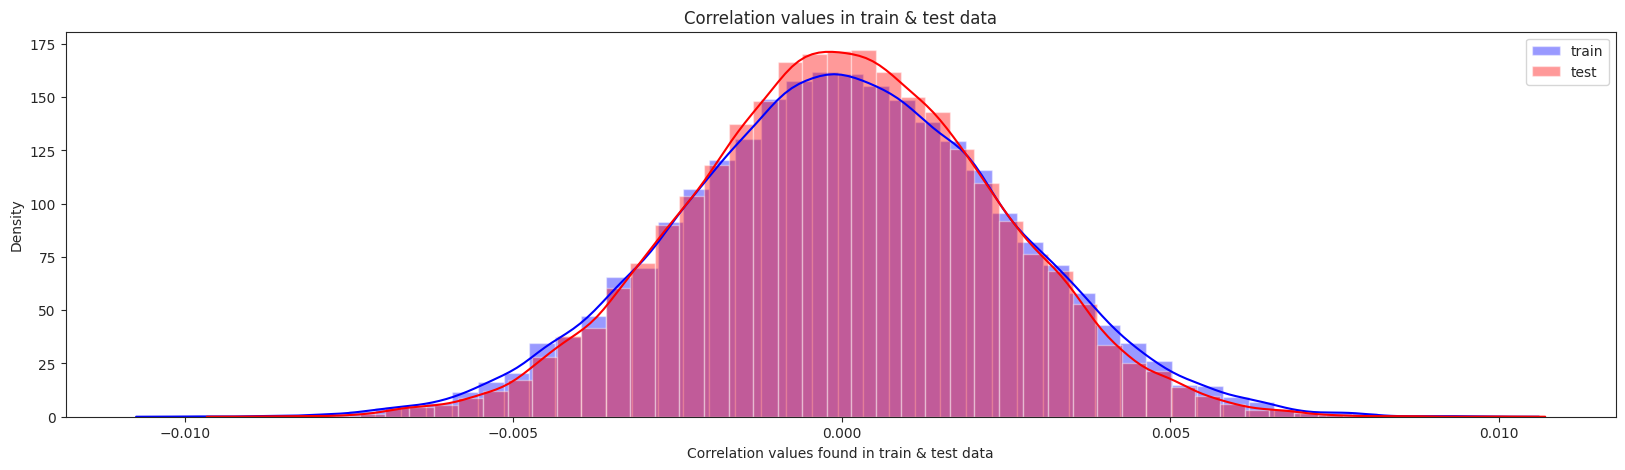

In [ ]:
train_correlation=train[train_attributes].corr()
train_correlation=train_correlation.values.flatten()
train_correlation=train_correlation[train_correlation!=1]


test_correlation=test[test_attributes].corr()
test_correlation=test_correlation.values.flatten()
test_correlation=test_correlation[test_correlation!=1]

plt.figure(figsize=(20,5))
sns.distplot(train_correlation,color="blue",label="train")
sns.distplot(test_correlation,color="red",label="test")
plt.xlabel("Correlation values found in train & test data")
plt.ylabel("Density")
plt.title ("Correlation values in train & test data")
plt.legend()

In [ ]:
#Observation:The correlation between the train and test data is very small, its completely visible from the above graph



In [ ]:
#Feature Engineering :-Performing feature engineering by using- - Permutation Importance - Partial dependence plots

In [6]:
#Training & testing data:
X=train.drop(columns=['ID_code','target'],axis=1)
test=test.drop(columns=['ID_code'],axis=1)
y=train['target']

Building a simple model to find the features which are more important:

In [7]:
#Split the train data:-
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

Random Forest Classifier:-

In [ ]:
#Calucating weights & Observing some Important features via using eli5 library- ELI5 is a Python package which helps to debug machine learning classifiers and explain their predictions.

In [8]:
#Spliting the data via Sratified KFold Cross Validator:-

#Training Data:
X=train.drop(['ID_code','target'],axis=1)
Y=train['target']

#Stratified KFold Cross Validator:-
skf=StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for train_index, valid_index in skf.split(X,Y):
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = Y.iloc[train_index], Y.iloc[valid_index]

print('Shape of X_train :',X_train.shape)
print('Shape of X_valid :',X_valid.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of y_valid :',y_valid.shape)

Shape of X_train : (160000, 200)
Shape of X_valid : (40000, 200)
Shape of y_train : (160000,)
Shape of y_valid : (40000,)


In [9]:
%%time
lr_model=LogisticRegression(random_state=42)
#fitting the model-
lr_model.fit(X_train,y_train)

CPU times: user 10.2 s, sys: 1.76 s, total: 12 s
Wall time: 9.18 s


LogisticRegression(random_state=42)

In [10]:
#Accuracy of model-
lr_score=lr_model.score(X_train,y_train)
print('Accuracy of lr_model :',lr_score)

Accuracy of lr_model : 0.9122


In [11]:
%%time
#Cross validation prediction of lr_model-
cv_predict=cross_val_predict(lr_model,X_valid,y_valid,cv=5)
#Cross validation score-
cv_score=cross_val_score(lr_model,X_valid,y_valid,cv=5)
print('cross val score :',np.average(cv_score))

cross val score : 0.9103749999999999
CPU times: user 23 s, sys: 4.18 s, total: 27.2 s
Wall time: 18.5 s


In [13]:
#Confusion matrix:-
cm=confusion_matrix(y_valid,cv_predict)
cm=pd.crosstab(y_valid,cv_predict)
cm

col_0       0    1
target            
0       35476  504
1        3081  939

In [ ]:
#ROC_AUC SCORE:-
roc_score=roc_auc_score(y_valid,cv_predict)
print('ROC Score:',roc_score)

ROC Score: 0.6097871537255357


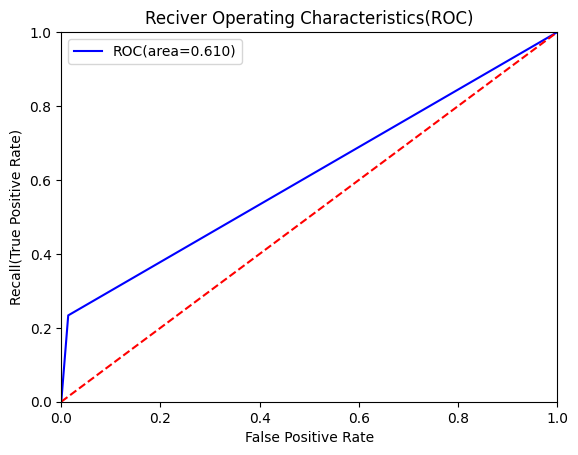

AUC: 0.6097871537255357


In [14]:
#ROC_AUC_Curve:-
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_valid,cv_predict)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

Observation:- On comparing roc_auc_score and model accuracy, model is not performing well on imbalanced data.

In [15]:
#Classification report:-
classification_scores=classification_report(y_valid,cv_predict)
print(classification_scores)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35980
           1       0.65      0.23      0.34      4020

    accuracy                           0.91     40000
   macro avg       0.79      0.61      0.65     40000
weighted avg       0.89      0.91      0.89     40000



In [16]:
#Observation:- As we see that f1 score is high for the customers who will not make a transaction, compare to those who will make a transaction. So, we are going to change the algorithm.

In [17]:
%%time
#Model performance on test data:-
#X_test=test.drop(['ID_code'],axis=1)
lr_pred=lr_model.predict(X_test)
print(lr_pred)

[0 0 0 ... 0 0 0]
CPU times: user 39.3 ms, sys: 4.73 ms, total: 44 ms
Wall time: 36 ms


In [18]:
#SMOTE ( Synthetic Minority Oversampling technique):- This is a statistical technique for increasing the number of cases in your dataset in a balanced way. It uses a nearest neighbors algorithm to generate new and synthetic data to used for training the model.

In [19]:
%%time
from imblearn.over_sampling import SMOTE
#SMOTE:-
sm = SMOTE(random_state=42,  sampling_strategy='auto')
#Generating synthetic data points
X_smote,y_smote=sm.fit_resample(X_train,y_train)
X_smote_v,y_smote_v=sm.fit_resample(X_valid,y_valid)

CPU times: user 10.1 s, sys: 953 ms, total: 11.1 s
Wall time: 7.31 s


Building Logistsic regression model on synthetic data points:-

In [20]:
%%time
#Logistic regression model for SMOTE:-
smote=LogisticRegression(random_state=42)
#fitting the smote model:-
smote.fit(X_smote,y_smote)

CPU times: user 19.4 s, sys: 3.64 s, total: 23 s
Wall time: 16.4 s


LogisticRegression(random_state=42)

In [21]:
#Accuracy of the model:-
smote_score=smote.score(X_smote,y_smote)
print('Accuracy of the smote_model :',smote_score)

Accuracy of the smote_model : 0.7890072400327955


In [22]:
%%time
#Cross validation prediction for SMOTE:-
cv_pred=cross_val_predict(smote,X_smote_v,y_smote_v,cv=5)
#Cross validation score:-
cv_score=cross_val_score(smote,X_smote_v,y_smote_v,cv=5)
print('Cross validation score :',np.average(cv_score))

Cross validation score : 0.7969566425792107
CPU times: user 41.7 s, sys: 7.24 s, total: 49 s
Wall time: 34.6 s


In [23]:
%%time
#Confusion matrix:-
cm=confusion_matrix(y_smote_v,cv_pred)
cm=pd.crosstab(y_smote_v,cv_pred)

CPU times: user 48.7 ms, sys: 42.9 ms, total: 91.5 ms
Wall time: 53.8 ms


In [24]:
#ROC_AUC SCORE:-
roc_score=roc_auc_score(y_smote_v,cv_pred)
print('ROC score:',roc_score)

ROC score: 0.7969566425792107


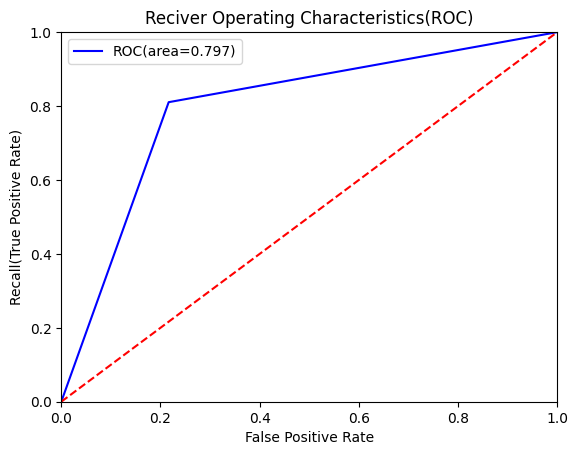

AUC: 0.7969566425792107


In [25]:
#ROC_AUC Curve:-
plt.figure()
false_positive_rate,recall,thresholds=roc_curve(y_smote_v,cv_pred)
roc_auc=auc(false_positive_rate,recall)
plt.title('Reciver Operating Characteristics(ROC)')
plt.plot(false_positive_rate,recall,'b',label='ROC(area=%0.3f)' %roc_auc)
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall(True Positive Rate)')
plt.xlabel('False Positive Rate')
plt.show()
print('AUC:',roc_auc)

In [26]:
#Classification Report:-
scores=classification_report(y_smote_v,cv_pred)
print(scores)

              precision    recall  f1-score   support

           0       0.81      0.78      0.79     35980
           1       0.79      0.81      0.80     35980

    accuracy                           0.80     71960
   macro avg       0.80      0.80      0.80     71960
weighted avg       0.80      0.80      0.80     71960



Model_performance on test data:-

In [27]:
%%time
#Predicting the model-
#X_test=test.drop(['ID_code'],axis=1)
smote_pred=smote.predict(X_test)
print(smote_pred)

[0 0 0 ... 0 0 0]
CPU times: user 33.9 ms, sys: 1.71 ms, total: 35.6 ms
Wall time: 27.1 ms


In [28]:
import pickle
import pandas as pd

In [31]:
submission = pd.DataFrame({'Predictions': smote_pred})
submission.to_csv('sample_submission.csv', index=False)

In [32]:
from google.colab import files

In [34]:
with open('model.pkl', 'wb') as f:
    pickle.dump(smote, f)

In [35]:
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Observation:- We can observe that the smote model is performing well on imbalance data as compare to logistic regression.

